##Download a text dataset

In [1]:
# Turn .csv files into pandas DataFrame's
import pandas as pd
spam_csv = pd.read_csv("spam.csv")

##Visualizing a text dataset
Once you've acquired a new dataset to work with, what should you do first?

Explore it? Inspect it? Verify it? Become one with it?

All correct.

Remember the motto: visualize, visualize, visualize.

Right now, our text data samples are in the form of .csv files. For an easy way to make them visual, let's turn them into pandas DataFrame's.

In [2]:
spam_csv.head(3)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [3]:
spam_csv = spam_csv.rename(columns={'Category': 'target',
                                    'Message': 'text'})

In [4]:
spam_csv.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
spam_csv.shape

(5572, 2)

In [6]:
# How many examples of each class?
spam_csv.target.value_counts()

ham     4825
spam     747
Name: target, dtype: int64

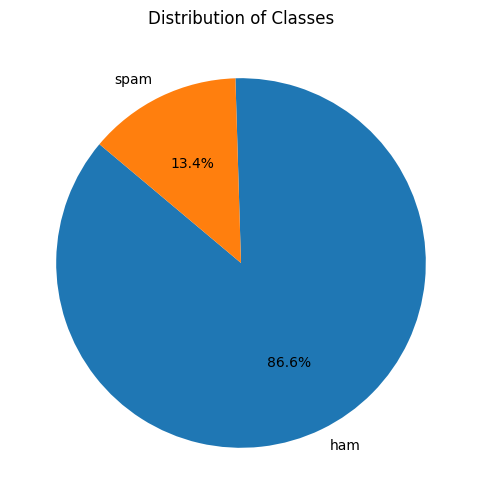

In [7]:
import matplotlib.pyplot as plt

# Count the number of examples of each class
class_counts = spam_csv['target'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Classes')
plt.show()

Since we have two target values, we're dealing with a `binary classification` problem.

In [9]:
# Let's visualize some random examples
import pandas as pd
import numpy as np

random_indices = np.random.randint(0, len(spam_csv), size=7)  # Selecting 5 random indices, you can change this number as per your need
# print(random_indices)

for i in random_indices:
    text_sentence = spam_csv.loc[i, 'text']  # Access text sentence at index i
    label = spam_csv.loc[i, 'target']  # Access label at index i
    print(f"Text sentence: {text_sentence}\nLabel: {label}")

Text sentence: Do you know when the result.
Label: ham
Text sentence: You have come into my life and brought the sun ..Shiny down on me, warming my heart. Putting a constant smile on my face ... Making me feel loved and cared for
Label: ham
Text sentence: Romantic Paris. 2 nights, 2 flights from £79 Book now 4 next year. Call 08704439680Ts&Cs apply.
Label: spam
Text sentence: I pocked you up there before
Label: ham
Text sentence: Then just eat a shit and wait for ur monkey face bitch.......... U asshole..................
Label: ham
Text sentence: Please protect yourself from e-threats. SIB never asks for sensitive information like Passwords,ATM/SMS PIN thru email. Never share your password with anybody.
Label: ham
Text sentence: Can ü all decide faster cos my sis going home liao..
Label: ham


##Split data into training and validation sets

In [10]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

X = spam_csv['text'].to_numpy()
y = spam_csv['target'].to_numpy()

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets (80% train, 20% test)
train_sentences, val_sentences, train_labels, val_labels = train_test_split(X, y_encoded, test_size=0.1, random_state=42)

In [11]:
# Check the lengths
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(5014, 5014, 558, 558)

In [12]:
# View the first 5 training sentences and their labels
train_sentences[:5], train_labels[:5]

(array(['Haha better late than ever, any way I could swing by?',
        'Thanks a lot for your wishes on my birthday. Thanks you for making my birthday truly memorable.',
        'A guy who gets used but is too dumb to realize it.',
        'Talk sexy!! Make new friends or fall in love in the worlds most discreet text dating service. Just text VIP to 83110 and see who you could meet.',
        'Nowadays people are notixiquating the laxinorficated opportunity for bambling of entropication.... Have you ever oblisingately opted ur books for the masteriastering amplikater of fidalfication? It is very champlaxigating, i think it is atrocious.. Wotz Ur Opinion???? Junna'],
       dtype=object),
 array([0, 0, 0, 1, 0]))

##Converting text into numbers
The dataset is slited into training and validation set containing emails and labels

As we can see out emails and labels are both in string form.

As a remainder deep learning algorithm requires it's inputs to be in numerical form.

In NLP, there are two main concepts for turning text into numbers:

In NLP, there are two main concepts for turning text into numbers:
* **Tokenization** - A straight mapping from word or character or sub-word to a numerical value. There are three main levels of tokenization:
  1. Using **word-level tokenization** with the sentence "I love TensorFlow" might result in "I" being `0`, "love" being `1` and "TensorFlow" being `2`. In this case, every word in a sequence considered a single **token**.
  2. **Character-level tokenization**, such as converting the letters A-Z to values `1-26`. In this case, every character in a sequence considered a single **token**.
  3. **Sub-word tokenization** is in between word-level and character-level tokenization. It involves breaking invidual words into smaller parts and then converting those smaller parts into numbers. For example, "my favourite food is pineapple pizza" might become "my, fav, avour, rite, fo, oo, od, is, pin, ine, app, le, piz, za". After doing this, these sub-words would then be mapped to a numerical value. In this case, every word could be considered multiple **tokens**.
* **Embeddings** - An embedding is a representation of natural language which can be learned. Representation comes in the form of a **feature vector**. For example, the word "dance" could be represented by the 5-dimensional vector `[-0.8547, 0.4559, -0.3332, 0.9877, 0.1112]`. It's important to note here, the size of the feature vector is tuneable. There are two ways to use embeddings:
  1. **Create your own embedding** - Once your text has been turned into numbers (required for an embedding), you can put them through an embedding layer (such as [`tf.keras.layers.Embedding`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding)) and an embedding representation will be learned during model training.
  2. **Reuse a pre-learned embedding** - Many pre-trained embeddings exist online. These pre-trained embeddings have often been learned on large corpuses of text (such as all of Wikipedia) and thus have a good underlying representation of natural language. You can use a pre-trained embedding to initialize your model and fine-tune it to your own specific task.

![](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/08-tokenization-vs-embedding.png)
*Example of **tokenization** (straight mapping from word to number) and **embedding** (richer representation of relationships between tokens).*

> **Question:** What level of tokenzation should I use? What embedding should I choose?

It depends on your problem. You could try character-level tokenization/embeddings and word-level tokenization/embeddings and see which perform best. You might even want to try stacking them (e.g. combining the outputs of your embedding layers using [`tf.keras.layers.concatenate`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/concatenate)).

If you're looking for pre-trained word embeddings, [Word2vec embeddings](http://jalammar.github.io/illustrated-word2vec/), [GloVe embeddings](https://nlp.stanford.edu/projects/glove/) and many of the options available on [TensorFlow Hub](https://tfhub.dev/s?module-type=text-embedding) are great places to start.

> 🔑 **Note:** Much like searching for a pre-trained computer vision model, you can search for pre-trained word embeddings to use for your problem. Try searching for something like "use pre-trained word embeddings in TensorFlow".

###Text vectorization (tokenization)

To tokenize our words, we'll use the helpful preprocessing layer [`tf.keras.layers.experimental.preprocessing.TextVectorization`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing/TextVectorization).

The `TextVectorization` layer takes the following parameters:
* `max_tokens` - The maximum number of words in your vocabulary (e.g. 20000 or the number of unique words in your text), includes a value for OOV (out of vocabulary) tokens.
* `standardize` - Method for standardizing text. Default is `"lower_and_strip_punctuation"` which lowers text and removes all punctuation marks.
* `split` - How to split text, default is `"whitespace"` which splits on spaces.
* `ngrams` - How many words to contain per token split, for example, `ngrams=2` splits tokens into continuous sequences of 2.
* `output_mode` -  How to output tokens, can be `"int"` (integer mapping), `"binary"` (one-hot encoding), `"count"` or `"tf-idf"`. See documentation for more.
* `output_sequence_length` - Length of tokenized sequence to output. For example, if `output_sequence_length=150`, all tokenized sequences will be 150 tokens long.
* `pad_to_max_tokens` - Defaults to `False`, if `True`, the output feature axis will be padded to `max_tokens` even if the number of unique tokens in the vocabulary is less than `max_tokens`. Only valid in certain modes, see docs for more.

Let's see it in action.

In [13]:
# How long is each sentence on average?
sentence_len = [len(sentence.split()) for sentence in train_sentences]
avg_sentence_lenght = np.mean(sentence_len)
avg_sentence_lenght # return average sentence length (in tokens)

15.60829676904667

(array([4.072e+03, 8.850e+02, 4.100e+01, 1.000e+01, 2.000e+00, 2.000e+00,
        2.000e+00]),
 array([  1.        ,  25.28571429,  49.57142857,  73.85714286,
         98.14285714, 122.42857143, 146.71428571, 171.        ]),
 <BarContainer object of 7 artists>)

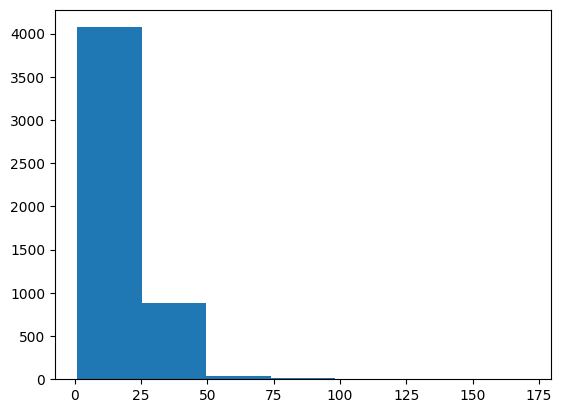

In [14]:
# What's the distribution look like?
import matplotlib.pyplot as plt
plt.hist(sentence_len, bins=7)

In [15]:
# How long of a sentence covers 95% of the lengths?
output_seq_len = int(np.percentile(sentence_len, 95))
output_seq_len

33

Wonderful! It looks like 95% of the sentences in our training set have a length of 33 tokens or less.

In [16]:
max(sentence_len)

171

In [18]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

# Setup text vectorization with custom variables
max_vocab_length = 10000 # max number of unique words to have in our vocabulary
max_length = 33 # how many words from an email does our model see?

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_sequence_length=max_length)

In [19]:
# Fit the text vectorizer to the training text
text_vectorizer.adapt(train_sentences)

In [20]:
# Create sample sentence and tokenize it
text_vectorizer(['I am learnig the deep learnign.'])

<tf.Tensor: shape=(1, 33), dtype=int64, numpy=
array([[  3,  64,   1,   6, 946,   1,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0]])>

In [21]:
import random
random_sentence = random.choice(train_sentences)

print(f"Original Sentence:\n{random_sentence}\n\nVertorized Version:")
text_vectorizer([random_sentence])

Original Sentence:
LORD OF THE RINGS:RETURN OF THE KING in store NOW!REPLY LOTR by 2 June 4 Chance 2 WIN LOTR soundtrack CDs StdTxtRate. Reply STOP to end txts

Vertorized Version:


<tf.Tensor: shape=(1, 33), dtype=int64, numpy=
array([[6426,   16,    6, 5390,   16,    6, 1108,    9,  970, 6024, 2349,
          75,   23, 1897,   43,  303,   23,  171, 2349, 5057, 1652, 4972,
          86,   85,    2,  310,  791,    0,    0,    0,    0,    0,    0]])>

In [22]:
# Get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5] # most common tokens (notice the [UNK] token for "unknown" words)
bottom_5_words = words_in_vocab[-5:] # least common tokens
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"Top 5 most common words: {top_5_words}")
print(f"Bottom 5 least common words: {bottom_5_words}")

Number of words in vocab: 9116
Top 5 most common words: ['', '[UNK]', 'to', 'i', 'you']
Bottom 5 least common words: ['0125698789', '01223585334', '01223585236', '0121', '0089my']


###Creating an Embedding using an Embedding Layer

### Creating an Embedding using an Embedding Layer

We've got a way to map our text to numbers. How about we go a step further and turn those numbers into an embedding?

The powerful thing about an embedding is it can be learned during training. This means rather than just being static (e.g. `1` = I, `2` = love, `3` = TensorFlow), a word's numeric representation can be improved as a model goes through data samples.

We can see what an embedding of a word looks like by using the [`tf.keras.layers.Embedding`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding) layer.

The main parameters we're concerned about here are:
* `input_dim` - The size of the vocabulary (e.g. `len(text_vectorizer.get_vocabulary()`).
* `output_dim` - The size of the output embedding vector, for example, a value of `100` outputs a  feature vector of size 100 for each word.
* `embeddings_initializer` - How to initialize the embeddings matrix, default is `"uniform"` which randomly initalizes embedding matrix with uniform distribution. This can be changed for using pre-learned embeddings.
* `input_length` - Length of sequences being passed to embedding layer.

Knowing these, let's make an embedding layer.

In [23]:
tf.random.set_seed(42)
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=len(words_in_vocab), # set input shape
                             output_dim=128,  # Greater the embedding size more the model learns. Note: different embedding sizes result in drastically different numbers of parameters to train
                             embeddings_initializer="uniform", # Allowing the model to learn and adjust them during training to better represent the relationships between words in the input data.
                             mask_zero=True, # it will ignore the zero values in the input sequence
                             input_length=max_length, # how long is each input
                             name="embedding_1")

embedding

In [24]:
# Get a random sentence from training set
random_sentence = random.choice(train_sentences)
print(f"Original Sentence:\n{random_sentence}\n\nEmbedded Version:")
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original Sentence:
Yo, call me when you get the chance, a friend of mine wanted me to ask you about a big order

Embedded Version:


<tf.Tensor: shape=(1, 33, 128), dtype=float32, numpy=
array([[[ 0.04654128, -0.00841182,  0.02052811, ...,  0.01364238,
         -0.04873126, -0.03584554],
        [ 0.01599587, -0.00731993,  0.01394811, ..., -0.00658675,
         -0.01162962,  0.04987307],
        [ 0.01369412, -0.03763973,  0.03772311, ...,  0.02598525,
         -0.02724702,  0.00930977],
        ...,
        [ 0.0431465 ,  0.02480706, -0.04521379, ..., -0.02754556,
          0.03110557, -0.0136107 ],
        [ 0.0431465 ,  0.02480706, -0.04521379, ..., -0.02754556,
          0.03110557, -0.0136107 ],
        [ 0.0431465 ,  0.02480706, -0.04521379, ..., -0.02754556,
          0.03110557, -0.0136107 ]]], dtype=float32)>

Each token in the sentence gets turned into a length 128 feature vector.

In [25]:
# Check out a single token's embedding
sample_embed[0][0]

<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([ 0.04654128, -0.00841182,  0.02052811,  0.0420435 ,  0.04514641,
       -0.0009796 , -0.04719089,  0.02326227, -0.01298182,  0.00616428,
        0.04984922,  0.027246  ,  0.03508917,  0.00116961,  0.03777282,
        0.04338649, -0.03085359, -0.03598846,  0.0308331 ,  0.00525215,
        0.04703143,  0.01065933,  0.03192874,  0.04166502, -0.0196725 ,
        0.04377221,  0.0455432 , -0.01623291,  0.04333441, -0.03812035,
        0.04301115,  0.02552381,  0.04743172, -0.03462247,  0.04416053,
        0.04582227,  0.00490315,  0.03553102, -0.03837403,  0.02087994,
        0.01983886,  0.03336431, -0.04199517, -0.0189479 , -0.04520879,
       -0.03334592, -0.03273028,  0.02810979, -0.00115745,  0.0174482 ,
       -0.03726753, -0.02780501,  0.01369048,  0.0057134 , -0.04326807,
        0.00865497, -0.04579022,  0.00898368, -0.04291907, -0.03795987,
       -0.02956342, -0.00218996,  0.0306039 , -0.03361188,  0.03282309,
       -0.025682

##Model 0: Getting a baseline

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create tokenization and modelling pipeline
model_0 = Pipeline([
                    ("tfidf", TfidfVectorizer()), # convert words to numbers using tfidf
                    ("clf", MultinomialNB()) # model the text
])

# Fit the pipeline to the training data
model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [27]:
baseline_score = model_0.score(val_sentences, val_labels)
print(f"Our baseline model achieves an accuracy of: {baseline_score*100:.2f}%")

Our baseline model achieves an accuracy of: 95.70%


In [28]:
# Make predictions
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

### Creating an evaluation function for our model experiments

* Accuracy
* Precision
* Recall
* F1-score

> 🔑 **Note:** Since we're dealing with a classification problem, the above metrics are the most appropriate. If we were working with a regression problem, other metrics such as MAE (mean absolute error) would be a better choice.

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def calculate_results(true_labels, predictions):
  """
  Evaluate a classification model using common metrics.

  Parameters:
  - predictions: Predicted labels from the model
  - true_labels: True labels from the dataset

  Returns:
  - accuracy: Accuracy of the model
  - precision: Precision of the model
  - recall: Recall of the model
  - f1_score: F1 score of the model
  """
  accuracy = accuracy_score(true_labels, predictions)
  precision = precision_score(true_labels, predictions)
  recall = recall_score(true_labels, predictions)
  f1 = f1_score(true_labels, predictions)

  model_results = {
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1_score': f1
  }

  return model_results

In [30]:
# Get baseline results
baseline_results = calculate_results(true_labels=val_labels,
                                     predictions=baseline_preds)
baseline_results

{'accuracy': 0.956989247311828,
 'precision': 1.0,
 'recall': 0.6712328767123288,
 'f1_score': 0.8032786885245902}

### Model 1: LSTM

In [54]:
import datetime

# Create tensorboard callback (need to create a new one for each model)
def create_tensorboard_callback(dir_name, experiment_name):
  """
  Creates a TensorBoard callback instand to store log files.

  Stores log files with the filepath:
    "dir_name/experiment_name/current_datetime/"

  Args:
    dir_name: target directory to store TensorBoard log files
    experiment_name: name of experiment directory (e.g. efficientnet_model_1)
  """
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

In [55]:
# Create directory to save TensorBoard logs
SAVE_DIR = 'model_logs'

In [74]:
# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)
from tensorflow.keras import layers
model_1_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_1")

In [75]:
# Create LSTM model
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_1_embedding(x)
x = layers.LSTM(64)(x) # return vector for whole sequence
# x = layers.Dense(64, activation="relu")(x) # optional dense layer on top of output of LSTM cell
outputs = layers.Dense(1, activation="sigmoid")(x)
model_1 = tf.keras.Model(inputs, outputs, name="model_1_LSTM")

In [76]:
# Compile model
model_1.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [77]:
# Fit model
model_1_history = model_1.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "LSTM")])

Saving TensorBoard log files to: model_logs/LSTM/20240325-093418
Epoch 1/5
157/157 [==============================] - 9s 41ms/step - loss: 0.1824 - accuracy: 0.9390 - val_loss: 0.0675 - val_accuracy: 0.9821
Epoch 2/5
157/157 [==============================] - 7s 43ms/step - loss: 0.0295 - accuracy: 0.9930 - val_loss: 0.1176 - val_accuracy: 0.9749
Epoch 3/5
157/157 [==============================] - 6s 37ms/step - loss: 0.0153 - accuracy: 0.9966 - val_loss: 0.0829 - val_accuracy: 0.9857
Epoch 4/5
157/157 [==============================] - 7s 43ms/step - loss: 0.0078 - accuracy: 0.9984 - val_loss: 0.0388 - val_accuracy: 0.9857
Epoch 5/5
157/157 [==============================] - 6s 37ms/step - loss: 0.0063 - accuracy: 0.9984 - val_loss: 0.0727 - val_accuracy: 0.9875


In [84]:
# Make predictions
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs[:10]

18/18 [==============================] - 0s 8ms/step


array([[2.8683603e-04],
       [2.1885282e-04],
       [2.0937998e-04],
       [2.0675201e-04],
       [5.7709986e-01],
       [2.1239204e-04],
       [2.4336624e-04],
       [2.0445566e-04],
       [2.1216333e-04],
       [2.1030374e-04]], dtype=float32)

In [85]:
# Round out predictions and reduce to 1-dimensional array
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs))
model_1_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)>

In [88]:
model_1_results = calculate_results(true_labels=val_labels,
                                    predictions=model_1_preds)

model_1_results

{'accuracy': 0.9874551971326165,
 'precision': 0.9714285714285714,
 'recall': 0.9315068493150684,
 'f1_score': 0.9510489510489512}

In [78]:
import matplotlib.pyplot as plt

def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  # Plot loss
  plt.figure(figsize=(12, 4))
  plt.subplot(1,2,1)
  plt.plot(loss, label='training_loss')
  plt.plot(val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('epochs')
  plt.legend()

  # Plot accuracy
  plt.subplot(1,2,2)
  plt.plot(accuracy, label='training_accuracy')
  plt.plot(val_accuracy, label='val_accuracy')
  plt.title('Accracy')
  plt.xlabel('epochs')
  plt.legend()

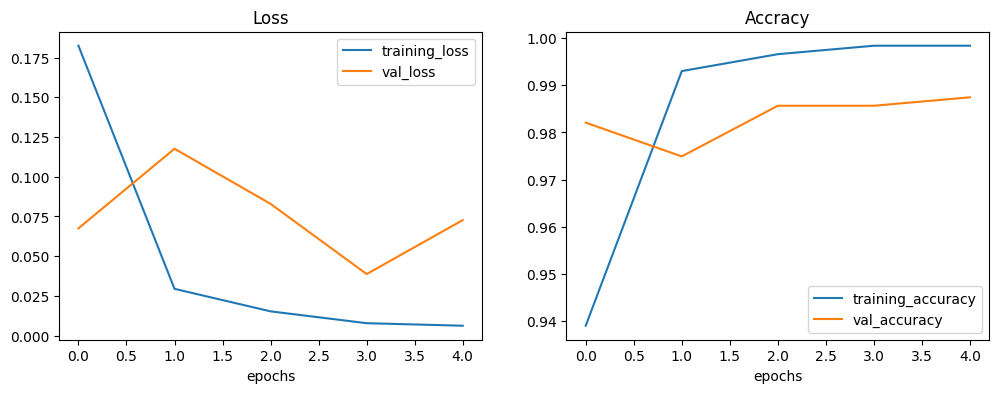

In [96]:
plot_loss_curves(model_1_history)

##Model 3: GRU

In [89]:
# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)
from tensorflow.keras import layers
model_2_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_2")

In [90]:
# Build an RNN using the GRU cell
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_2_embedding(x)
x = layers.GRU(64)(x)
# x = layers.Dense(64, activation="relu")(x) # optional dense layer after GRU cell
outputs = layers.Dense(1, activation="sigmoid")(x)
model_2 = tf.keras.Model(inputs, outputs, name="model_2_GRU")

In [92]:
# Compile GRU model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [93]:
# Fit model
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "GRU")])

Saving TensorBoard log files to: model_logs/GRU/20240325-094152
Epoch 1/5
157/157 [==============================] - 10s 47ms/step - loss: 0.2330 - accuracy: 0.9200 - val_loss: 0.0803 - val_accuracy: 0.9803
Epoch 2/5
157/157 [==============================] - 6s 37ms/step - loss: 0.0341 - accuracy: 0.9912 - val_loss: 0.0765 - val_accuracy: 0.9821
Epoch 3/5
157/157 [==============================] - 7s 43ms/step - loss: 0.0113 - accuracy: 0.9972 - val_loss: 0.0677 - val_accuracy: 0.9857
Epoch 4/5
157/157 [==============================] - 6s 37ms/step - loss: 0.0125 - accuracy: 0.9972 - val_loss: 0.0769 - val_accuracy: 0.9839
Epoch 5/5
157/157 [==============================] - 7s 43ms/step - loss: 0.0089 - accuracy: 0.9980 - val_loss: 0.0772 - val_accuracy: 0.9839


In [94]:
# Make predictions on the validation data
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs.shape, model_2_pred_probs[:10]

18/18 [==============================] - 1s 8ms/step


((558, 1),
 array([[0.00037532],
        [0.00036431],
        [0.0003012 ],
        [0.00032379],
        [0.0010625 ],
        [0.00032382],
        [0.00032968],
        [0.00028429],
        [0.00032835],
        [0.00037301]], dtype=float32))

In [95]:
# Convert prediction probabilities to prediction classes
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>

In [106]:
model_2_results = calculate_results(true_labels=val_labels,
                                    predictions=model_2_preds)
model_2_results

{'accuracy': 0.9838709677419355,
 'precision': 0.9571428571428572,
 'recall': 0.9178082191780822,
 'f1_score': 0.9370629370629371}

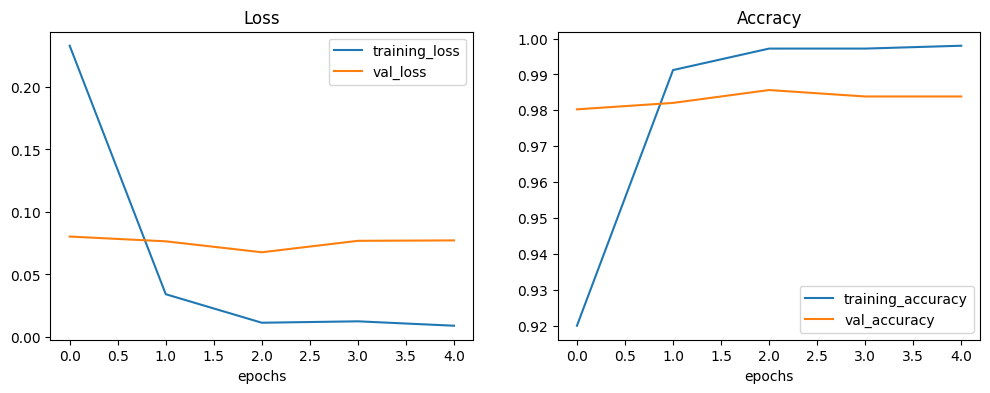

In [98]:
plot_loss_curves(model_2_history)

##Model 3: Bidirectional-LSTM model

In [99]:
# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)
from tensorflow.keras import layers
model_3_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_3")

In [100]:
# Build a Bidirectional RNN in TensorFlow
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_3_embedding(x)
x = layers.Bidirectional(layers.LSTM(64))(x) # bidirectional goes both ways so has double the parameters of a regular LSTM layer
outputs = layers.Dense(1, activation="sigmoid")(x)
model_3 = tf.keras.Model(inputs, outputs, name="model_3_Bidirectional")

In [102]:
# Compile
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [103]:
# Fit the model (takes longer because of the bidirectional layers)
model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "bidirectional_RNN")])

Saving TensorBoard log files to: model_logs/bidirectional_RNN/20240325-094519
Epoch 1/5
157/157 [==============================] - 14s 65ms/step - loss: 0.1685 - accuracy: 0.9382 - val_loss: 0.0636 - val_accuracy: 0.9821
Epoch 2/5
157/157 [==============================] - 9s 59ms/step - loss: 0.0267 - accuracy: 0.9926 - val_loss: 0.0759 - val_accuracy: 0.9839
Epoch 3/5
157/157 [==============================] - 8s 52ms/step - loss: 0.0101 - accuracy: 0.9974 - val_loss: 0.0707 - val_accuracy: 0.9821
Epoch 4/5
157/157 [==============================] - 9s 58ms/step - loss: 0.0041 - accuracy: 0.9986 - val_loss: 0.0807 - val_accuracy: 0.9875
Epoch 5/5
157/157 [==============================] - 9s 58ms/step - loss: 8.8397e-04 - accuracy: 0.9998 - val_loss: 0.0995 - val_accuracy: 0.9857


In [104]:
# Make predictions with bidirectional RNN on the validation data
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs[:10]

18/18 [==============================] - 2s 12ms/step


array([[2.2384003e-04],
       [1.2299622e-04],
       [9.5065625e-05],
       [1.0181754e-04],
       [3.1924591e-04],
       [1.4330742e-04],
       [1.4311309e-04],
       [7.3259871e-05],
       [1.2850386e-04],
       [1.0643435e-04]], dtype=float32)

In [105]:
# Convert prediction probabilities to labels
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>

In [107]:
model_3_results = calculate_results(true_labels=val_labels,
                                    predictions=model_3_preds)

model_3_results

{'accuracy': 0.985663082437276,
 'precision': 0.9850746268656716,
 'recall': 0.9041095890410958,
 'f1_score': 0.9428571428571428}

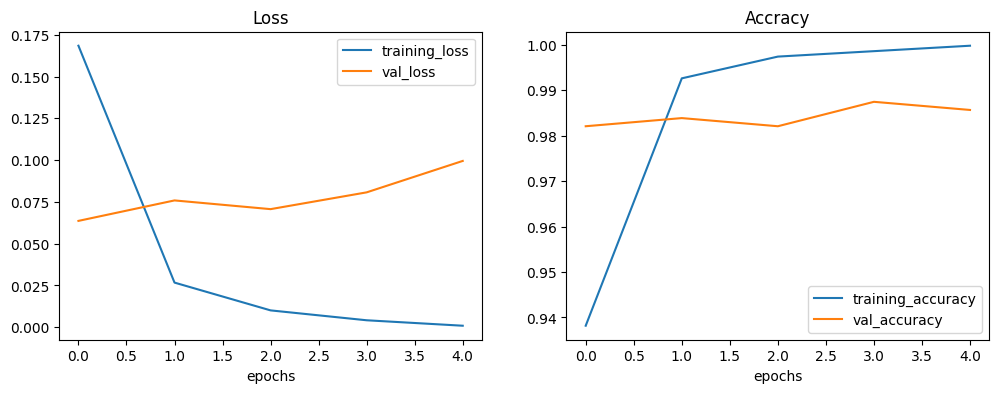

In [108]:
plot_loss_curves(model_3_history)

##Model 4: TensorFlow Hub Pretrained Feature Extractor

In [110]:
# Example of pretrained embedding with universal sentence encoder - https://tfhub.dev/google/universal-sentence-encoder/4
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4") # load Universal Sentence Encoder

In [111]:
# We can use this encoding layer in place of our text_vectorizer and embedding layer
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[], # shape of inputs coming to our model
                                        dtype=tf.string, # data type of inputs coming to the USE layer
                                        trainable=False, # keep the pretrained weights (we'll create a feature extractor)
                                        name="USE")

In [112]:
# Create model using the Sequential API
model_4 = tf.keras.Sequential([
  sentence_encoder_layer, # take in sentences and then encode them into an embedding
  layers.Dense(64, activation="relu"),
  layers.Dense(1, activation="sigmoid")
], name="model_4_USE")

# Compile model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_4.summary()

Model: "model_4_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_13 (Dense)            (None, 64)                32832     
                                                                 
 dense_14 (Dense)            (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [113]:
# Train a classifier on top of pretrained embeddings
model_4_history = model_4.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder/20240325-094915
Epoch 1/5
157/157 [==============================] - 5s 16ms/step - loss: 0.2475 - accuracy: 0.9284 - val_loss: 0.1031 - val_accuracy: 0.9695
Epoch 2/5
157/157 [==============================] - 2s 14ms/step - loss: 0.0695 - accuracy: 0.9809 - val_loss: 0.0677 - val_accuracy: 0.9731
Epoch 3/5
157/157 [==============================] - 3s 19ms/step - loss: 0.0495 - accuracy: 0.9852 - val_loss: 0.0545 - val_accuracy: 0.9785
Epoch 4/5
157/157 [==============================] - 2s 13ms/step - loss: 0.0403 - accuracy: 0.9884 - val_loss: 0.0497 - val_accuracy: 0.9803
Epoch 5/5
157/157 [==============================] - 2s 12ms/step - loss: 0.0345 - accuracy: 0.9904 - val_loss: 0.0465 - val_accuracy: 0.9821


In [114]:
# Make predictions with USE TF Hub model
model_4_pred_probs = model_4.predict(val_sentences)
model_4_pred_probs[:10]

18/18 [==============================] - 1s 10ms/step


array([[1.0908809e-03],
       [1.4644620e-03],
       [8.7682165e-05],
       [2.6582903e-04],
       [1.4125010e-02],
       [3.5049983e-05],
       [8.4115770e-03],
       [2.1620345e-04],
       [1.3364120e-04],
       [6.5028536e-05]], dtype=float32)

In [115]:
# Convert prediction probabilities to labels
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>

In [117]:
# Calculate model 4 performance metrics
model_4_results = calculate_results(val_labels, model_4_preds)
model_4_results

{'accuracy': 0.982078853046595,
 'precision': 0.9436619718309859,
 'recall': 0.9178082191780822,
 'f1_score': 0.9305555555555556}

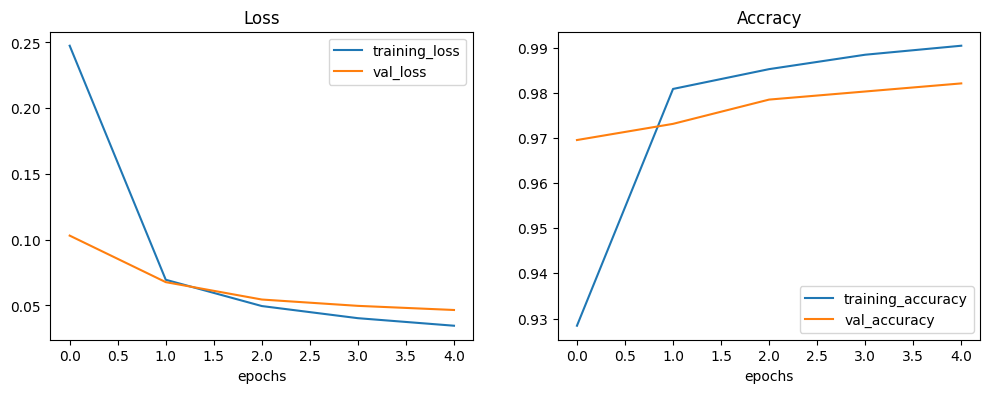

In [118]:
plot_loss_curves(model_4_history)

##Saving, loading and downloaded a trained model

In [166]:
# Save TF Hub Sentence Encoder model to HDF5 format
model_4.save("model_4_spam_detection.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [168]:
# Load model with custom Hub Layer (required with HDF5 format)
loaded_model_4 = tf.keras.models.load_model("model_4_spam_detection.h5",
                                            custom_objects={"KerasLayer": hub.KerasLayer})

In [169]:
# How does our loaded model perform?
loaded_model_4.evaluate(val_sentences, val_labels)

18/18 [==============================] - 1s 11ms/step - loss: 0.0465 - accuracy: 0.9821


[0.04651113227009773, 0.9820788502693176]

In [170]:
model_4_results

{'accuracy': 0.982078853046595,
 'precision': 0.9436619718309859,
 'recall': 0.9178082191780822,
 'f1_score': 0.9305555555555556}

In [173]:
import numpy as np

# Calculate the accuracy of the loaded model
loaded_model_accuracy = loaded_model_4.evaluate(val_sentences, val_labels)[1]

# Compare the accuracy of the loaded model with the unsaved model
accuracy_comparison = np.isclose(model_4_results['accuracy'], loaded_model_accuracy)

# Print the result
print("Accuracy comparison between unsaved model and loaded model:", accuracy_comparison)

18/18 [==============================] - 0s 13ms/step - loss: 0.0465 - accuracy: 0.9821
Accuracy comparison between unsaved model and loaded model: True


In [ ]:
from google.colab import files

# Download the saved model file
files.download('/content/model_4_spam_detection.h5')

##Comparing the performance of each of our models

In [120]:
# Combine model results into a DataFrame
all_model_results = pd.DataFrame({"baseline": baseline_results,
                                  "lstm": model_1_results,
                                  "gru": model_2_results,
                                  "bidirectional": model_3_results,
                                  "tf_hub_sentence_encoder": model_4_results})
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1_score
baseline,0.956989,1.000000,0.671233,0.803279
lstm,0.987455,0.971429,0.931507,0.951049
gru,0.983871,0.957143,0.917808,0.937063
bidirectional,0.985663,0.985075,0.904110,0.942857
tf_hub_sentence_encoder,0.982079,0.943662,0.917808,0.930556


In [127]:
# Reduce the accuracy to same scale as other metrics
all_model_results["accuracy"] = all_model_results["accuracy"]/100

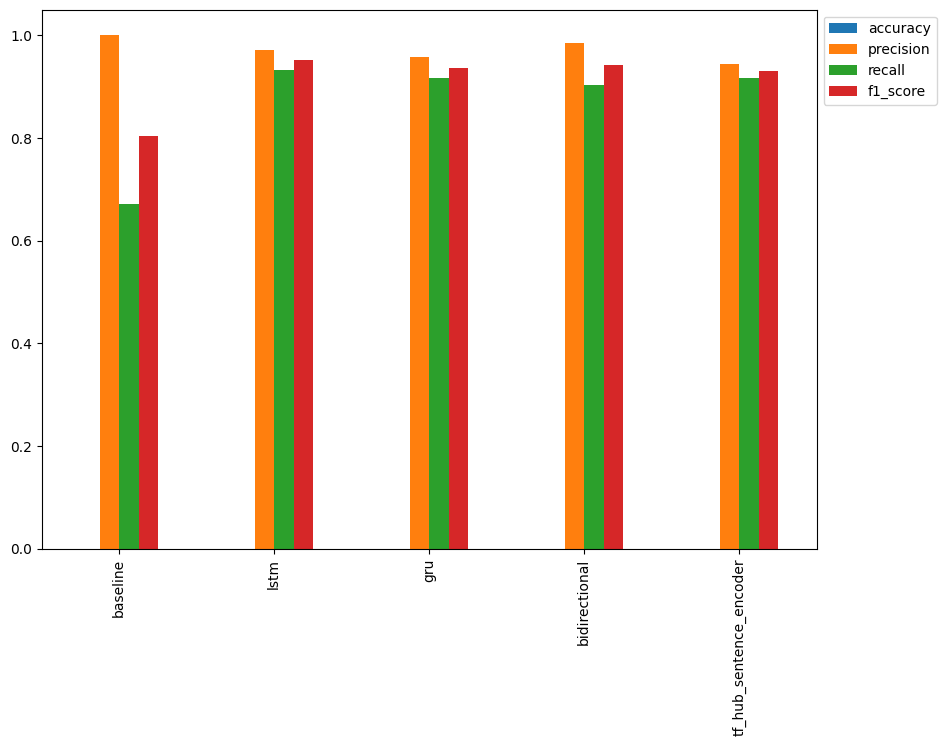

In [128]:
# Plot and compare all of the model results
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

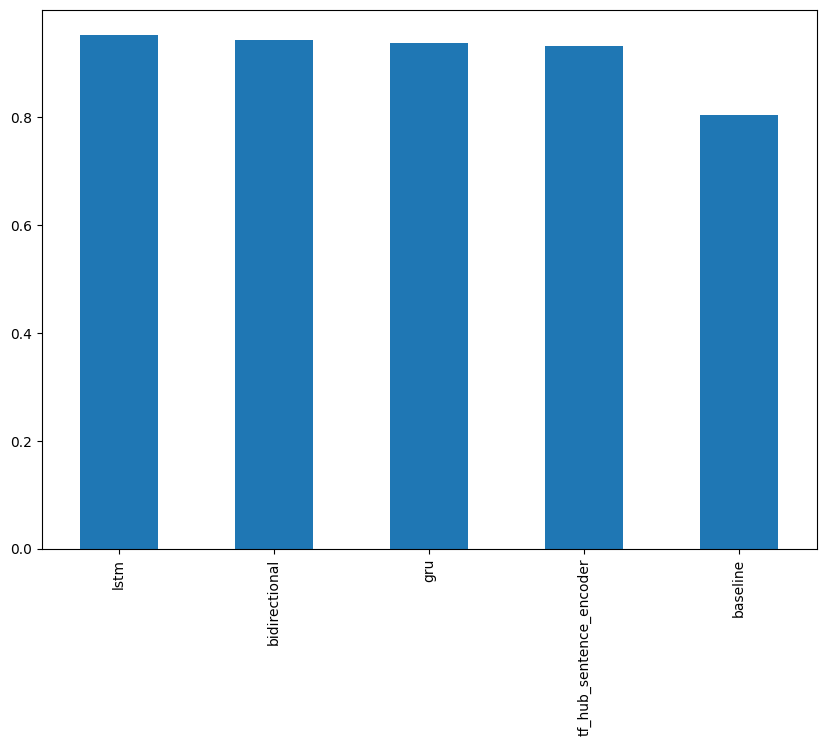

In [131]:
# Sort model results by f1-score
all_model_results.sort_values("f1_score", ascending=False)["f1_score"].plot(kind="bar", figsize=(10, 7));

##Finding the most wrong examples

In [134]:
# Create dataframe with validation sentences and best performing model predictions
val_df = pd.DataFrame({"text": val_sentences,
                       "target": val_labels,
                       "pred": model_4_preds,
                       "pred_prob": tf.squeeze(model_4_pred_probs)})
val_df.head()

,text,target,pred,pred_prob
0,Squeeeeeze!! This is christmas hug.. If u lik ...,0,0.0,0.001091
1,And also I've sorta blown him off a couple tim...,0,0.0,0.001464
2,Mmm thats better now i got a roast down me! i...,0,0.0,0.000088
3,Mm have some kanji dont eat anything heavy ok,0,0.0,0.000266
4,So there's a ring that comes with the guys cos...,0,0.0,0.014125


In [135]:
# Find the wrong predictions and sort by prediction probabilities
most_wrong = val_df[val_df["target"] != val_df["pred"]].sort_values("pred_prob", ascending=False)
most_wrong[:10]

,text,target,pred,pred_prob
360,Si.como no?!listened2the plaid album-quite gd&...,0,1.0,0.886856
359,We are pleased to inform that your application...,0,1.0,0.882704
116,Your account has been refilled successfully by...,0,1.0,0.654362
185,"Send ur birthdate with month and year, I will ...",0,1.0,0.519430
160,Babe: U want me dont u baby! Im nasty and have...,1,0.0,0.432483
234,Hello darling how are you today? I would love ...,1,0.0,0.241684
74,Oh my god! I've found your number again! I'm s...,1,0.0,0.145050
552,#ERROR!,1,0.0,0.116359
530,A link to your picture has been sent. You can ...,1,0.0,0.111489
272,"Do you realize that in about 40 years, we'll h...",1,0.0,0.054806


##Predicting on mail from the wild

In [136]:
# Turn mail into string
mail = "Life like an ensemble: take the best choices from others and make your own"

In [146]:
def predict_on_sentence(model, sentence):
  """
  Uses model to make a prediction on sentence.

  Returns the sentence, the predicted label and the prediction probability.
  """
  pred_prob = model.predict([sentence])
  pred_label = tf.squeeze(tf.round(pred_prob)).numpy()
  print(f"Pred: {pred_label}", "Spam" if pred_label > 0 else "ham", f"Prob: {pred_prob[0][0]}")
  print(f"Text:\n{sentence}")

In [152]:
# Make a prediction on mail from the wild
predict_on_sentence(model=model_4, # use the USE model
                    sentence=mail)

1/1 [==============================] - 0s 43ms/step
Pred: 0.0 ham Prob: 0.05803154036402702
Text:
Life like an ensemble: take the best choices from others and make your own


In [150]:
mail_2 = "Congratulations! You've won a free trip to Hawaii. Click here to claim your prize now!"

In [151]:
# Make a prediction on mail from the wild
predict_on_sentence(model=model_4, # use the USE model
                    sentence=mail_2)

1/1 [==============================] - 0s 42ms/step
Pred: 1.0 Spam Prob: 0.8618290424346924
Text:
Congratulations! You've won a free trip to Hawaii. Click here to claim your prize now!


In [153]:
mail_3 = "URGENT: Your account has been compromised. Please click on the following link to reset your password immediately to secure your account."

In [155]:
# Make a prediction on mail from the wild
predict_on_sentence(model=model_4, # use the USE model
                    sentence=mail_3)

1/1 [==============================] - 0s 43ms/step
Pred: 1.0 Spam Prob: 0.8114520311355591
Text:
URGENT: Your account has been compromised. Please click on the following link to reset your password immediately to secure your account.


In [164]:
mail_4 = """Subject: Meeting Tomorrow

Hi team,

Just a reminder that we have a meeting scheduled for tomorrow at 10:00 AM in the conference room.

Best regards,
Ali Shan"""

In [165]:
# Make a prediction on mail from the wild
predict_on_sentence(model=model_4, # use the USE model
                    sentence=mail_4)

1/1 [==============================] - 0s 45ms/step
Pred: 0.0 ham Prob: 0.41394901275634766
Text:
Subject: Meeting Tomorrow

Hi team,

Just a reminder that we have a meeting scheduled for tomorrow at 10:00 AM in the conference room.

Best regards,
Ali Shan


In [176]:
mail_5 = """Hi John,

Just wanted to let you know that I received the package you sent. Everything looks great! Thank you so much for your help.

Best regards,
Sarah"""

In [177]:
# Make a prediction on mail from the wild
predict_on_sentence(model=model_4, # use the USE model
                    sentence=mail_5)

1/1 [==============================] - 0s 50ms/step
Pred: 0.0 ham Prob: 0.00378359854221344
Text:
Hi John,

Just wanted to let you know that I received the package you sent. Everything looks great! Thank you so much for your help.

Best regards,
Sarah
